<a href="https://colab.research.google.com/github/datasolut/tutorials/blob/master/Anwendungsbeispiel_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1: Klassifikation Handgeschriebener Ziffern.

In [ ]:
# import von TF
import tensorflow as tf
# Handgeschriebene Ziffern laden
mnist = tf.keras.datasets.mnist

# Aufteilung in Training- und Testset
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
 

11493376/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)


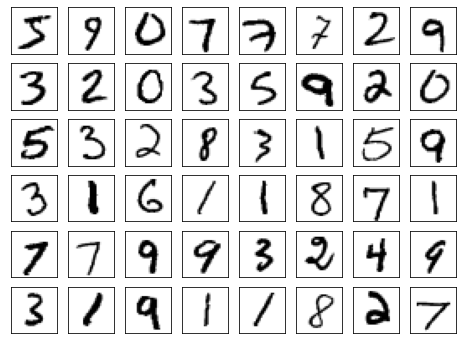

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(6, 8, subplot_kw=dict(xticks=[], yticks=[]), figsize=(8,6))
for i, axi in enumerate(ax.flat):
  axi.imshow(x_train[1250*i], cmap='gray_r')
print(x_train.shape)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout

# TF Bilderkennungsmodell
model1 = Sequential([
  Flatten(input_shape=(28, 28)),
  Dense(512, activation='relu'),
  Dropout(0.2),
  Dense(10, activation='softmax')
])
 
# Crossentropy für die 10 Zahlen Klassen
model1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
 
# Modellfitting und Evaluation
model1.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

print('Performance on test data: ', model1.evaluate(x_test, y_test))

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2183 - accuracy: 0.9358 - val_loss: 0.0997 - val_accuracy: 0.9680
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0972 - accuracy: 0.9699 - val_loss: 0.0850 - val_accuracy: 0.9736
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0690 - accuracy: 0.9781 - val_loss: 0.0737 - val_accuracy: 0.9778
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0534 - accuracy: 0.9822 - val_loss: 0.0622 - val_accuracy: 0.9803
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0599 - accuracy: 0.9816
Performance on test data:  [0.0599280446767807, 0.9815999865531921]


# 2. Klassifikation von Tieren und Fahrzeugen

In [ ]:
cifar10 = tf.keras.datasets.cifar10

# Aufteilung in Training- und Testset
(x_train, y_train),(x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

label_names = ['airplane', 'automobile','bird','cat','deer','dog','frog','horse','ship','truck']

170500096/170498071 [==============================] - 4s 0us/step


(50000, 32, 32, 3)


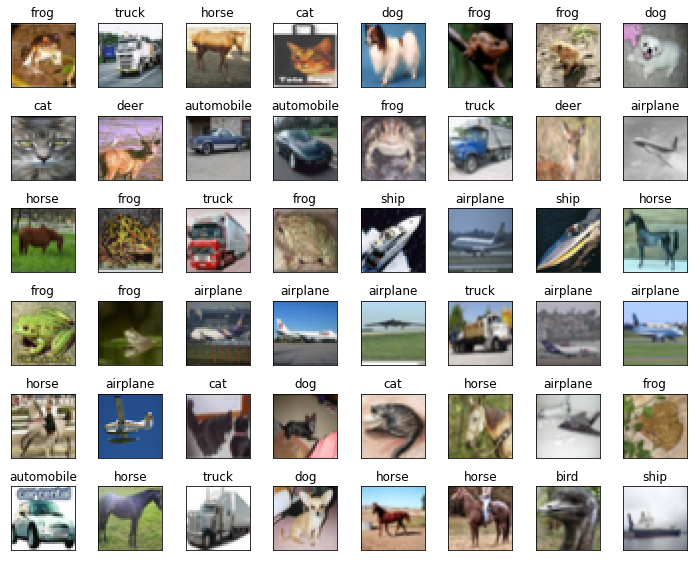

In [ ]:
fig, ax = plt.subplots(6, 8, subplot_kw=dict(xticks=[], yticks=[]), figsize=(10,8))
fig.tight_layout(pad=2)
for i, axi in enumerate(ax.flat):
  axi.imshow(x_train[1000*i], cmap='gray_r')
  axi.set_title(label_names[y_train[1000*i][0]])
print(x_train.shape)

In [ ]:
# TF Bilderkennungsmodell
model2 = Sequential([
  Flatten(input_shape=(32, 32, 3)),
  Dense(512, activation=tf.nn.relu),
  Dropout(0.2),
  Dense(10, activation=tf.nn.softmax)
])
 
# Crossentropy für die 10 Zahlen Klassen
model2.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
 
# Modellfitting und Evaluation
fit_history = model2.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test))
print('')
print('Performance on test data: ', model2.evaluate(x_test, y_test))

Epoch 1/20
1563/1563 [==============================] - 4s 3ms/step - loss: 1.8900 - accuracy: 0.3268 - val_loss: 1.7793 - val_accuracy: 0.3658
Epoch 2/20
1563/1563 [==============================] - 4s 3ms/step - loss: 1.7180 - accuracy: 0.3949 - val_loss: 1.6555 - val_accuracy: 0.4122
Epoch 3/20
1563/1563 [==============================] - 4s 3ms/step - loss: 1.6466 - accuracy: 0.4203 - val_loss: 1.6069 - val_accuracy: 0.4388
Epoch 4/20
1563/1563 [==============================] - 4s 3ms/step - loss: 1.5960 - accuracy: 0.4383 - val_loss: 1.6128 - val_accuracy: 0.4254
Epoch 5/20
1563/1563 [==============================] - 4s 3ms/step - loss: 1.5633 - accuracy: 0.4521 - val_loss: 1.6119 - val_accuracy: 0.4170
Epoch 6/20
1563/1563 [==============================] - 4s 3ms/step - loss: 1.5302 - accuracy: 0.4620 - val_loss: 1.5053 - val_accuracy: 0.4669
Epoch 7/20
1563/1563 [==============================] - 4s 3ms/step - loss: 1.5039 - accuracy: 0.4711 - val_loss: 1.5135 - val_accuracy:

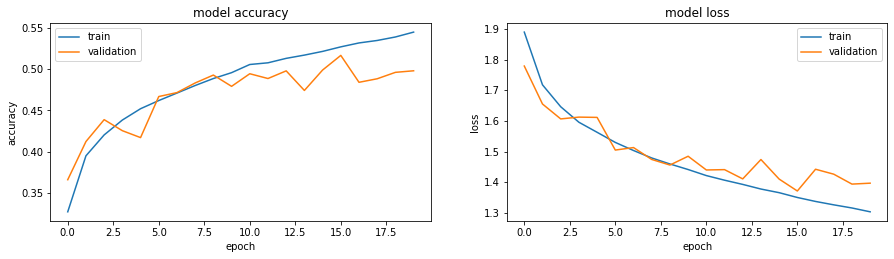

In [ ]:
plt.figure(1, figsize = (15,8))
    
plt.subplot(221)  
plt.plot(fit_history.history['accuracy'])  
plt.plot(fit_history.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'validation']) ;
    
plt.subplot(222)  
plt.plot(fit_history.history['loss'])  
plt.plot(fit_history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'validation']);

In [ ]:
y_prob = model2.predict(x_test) 
y_classes = y_prob.argmax(axis=-1)
y_classes

array([3, 8, 0, ..., 3, 6, 4])

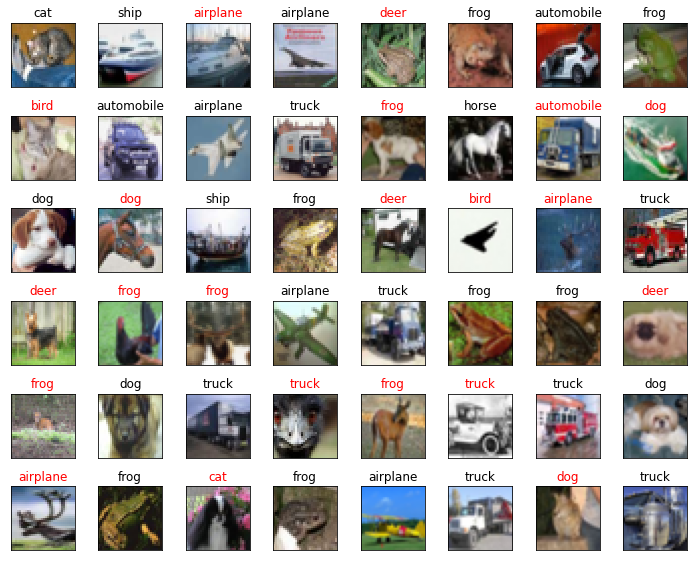

In [ ]:
fig, ax = plt.subplots(6, 8, subplot_kw=dict(xticks=[], yticks=[]), figsize=(10,8))
fig.tight_layout(pad=2)
for i, axi in enumerate(ax.flat):
  color = 'black'
  if y_classes[i]!=y_test[i][0]: color='r'
  axi.imshow(x_test[i], cmap='gray_r')
  axi.set_title(label_names[y_classes[i]], color=color)

#3. Convolutional Neural Network

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D

num_filters = 8
filter_size = 3
pool_size = 2

# TF Bilderkennungsmodell
model3 = Sequential([
  Conv2D(num_filters, filter_size, input_shape=(32, 32, 3), activation='relu'),
  MaxPooling2D(pool_size=pool_size),
  Flatten(),
  Dense(10, activation='softmax'),  
])
 
# Crossentropy für die 10 Zahlen Klassen
model3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
 
# Modellfitting und Evaluation
fit_history_3 = model3.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test))
model3.evaluate(x_test, y_test)

Epoch 1/20
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6435 - accuracy: 0.4217 - val_loss: 1.4447 - val_accuracy: 0.4946
Epoch 2/20
1563/1563 [==============================] - 4s 3ms/step - loss: 1.3947 - accuracy: 0.5126 - val_loss: 1.3721 - val_accuracy: 0.5135
Epoch 3/20
1563/1563 [==============================] - 4s 3ms/step - loss: 1.3122 - accuracy: 0.5396 - val_loss: 1.3158 - val_accuracy: 0.5435
Epoch 4/20
1563/1563 [==============================] - 4s 3ms/step - loss: 1.2608 - accuracy: 0.5617 - val_loss: 1.3025 - val_accuracy: 0.5463
Epoch 5/20
1563/1563 [==============================] - 4s 3ms/step - loss: 1.2249 - accuracy: 0.5752 - val_loss: 1.3071 - val_accuracy: 0.5470
Epoch 6/20
1563/1563 [==============================] - 4s 3ms/step - loss: 1.1977 - accuracy: 0.5854 - val_loss: 1.2507 - val_accuracy: 0.5629
Epoch 7/20
1563/1563 [==============================] - 4s 3ms/step - loss: 1.1709 - accuracy: 0.5946 - val_loss: 1.2442 - val_accuracy:

[1.1886661052703857, 0.5928999781608582]

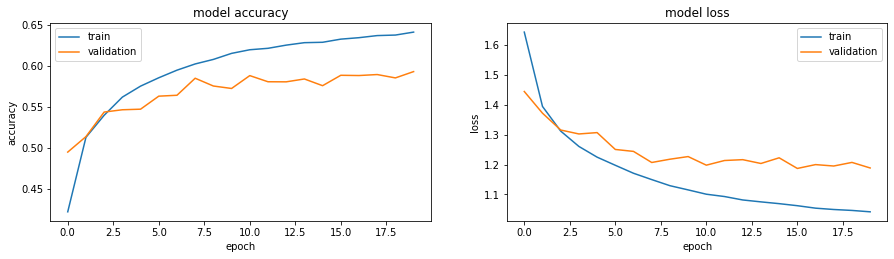

In [ ]:
plt.figure(1, figsize = (15,8)) 
    
plt.subplot(221)  
plt.plot(fit_history_3.history['accuracy'])  
plt.plot(fit_history_3.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'validation']) 
    
plt.subplot(222)  
plt.plot(fit_history_3.history['loss'])  
plt.plot(fit_history_3.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'validation']);

In [ ]:
y_prob = model3.predict(x_test) 
y_classes = y_prob.argmax(axis=-1)
y_classes

array([3, 8, 8, ..., 5, 1, 7])

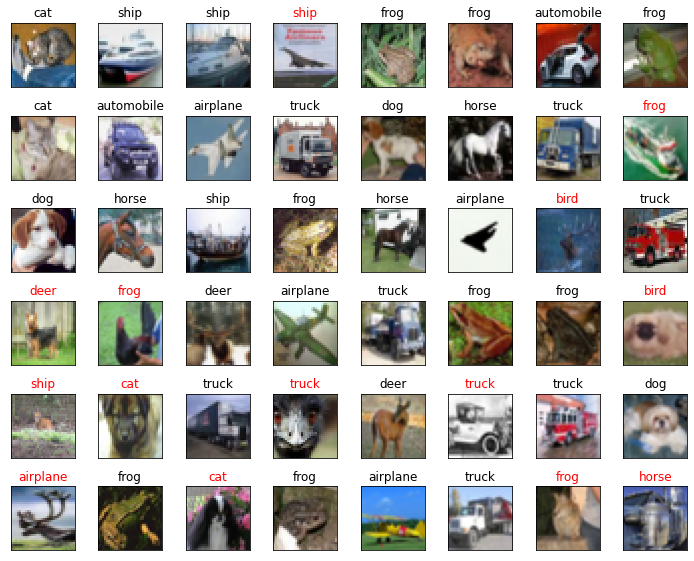

In [ ]:
fig, ax = plt.subplots(6, 8, subplot_kw=dict(xticks=[], yticks=[]), figsize=(10,8))
fig.tight_layout(pad=2)
for i, axi in enumerate(ax.flat):
  color = 'black'
  if y_classes[i]!=y_test[i][0]: color='r'
  axi.imshow(x_test[i], cmap='gray_r')
  axi.set_title(label_names[y_classes[i]], color=color)

In [ ]:
from keras.optimizers import SGD
from tensorflow.keras.layers import Dropout

In [ ]:
# TF Bilderkennungsmodell
model4 = tf.keras.models.Sequential([
  Conv2D(32, 3, activation='relu', input_shape=(32, 32, 3)),
  Conv2D(64, 3, activation='relu'),
  MaxPooling2D(pool_size=2),
  Flatten(),
  Dropout(0.25),
  Dense(128, activation='relu'),
  Dropout(0.25),
  Dense(10, activation='softmax'),  
])
 
# Crossentropy für die 10 Klassen
opt = SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
model4.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
 
# Modellfitting und Evaluation
fit_history_4 = model4.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))
model4.evaluate(x_test, y_test)

Epoch 1/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.5657 - accuracy: 0.4342 - val_loss: 1.2081 - val_accuracy: 0.5672
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1578 - accuracy: 0.5897 - val_loss: 1.1448 - val_accuracy: 0.5964
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9978 - accuracy: 0.6491 - val_loss: 0.9953 - val_accuracy: 0.6466
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8747 - accuracy: 0.6893 - val_loss: 0.9368 - val_accuracy: 0.6753
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7780 - accuracy: 0.7261 - val_loss: 0.9607 - val_accuracy: 0.6654
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6883 - accuracy: 0.7563 - val_loss: 0.9445 - val_accuracy: 0.6773
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6131 - accuracy: 0.7845 - val_loss: 0.9369 - val_accuracy:

[1.0692192316055298, 0.6863999962806702]

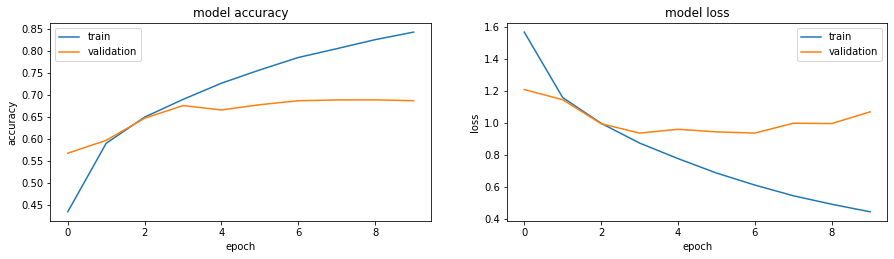

In [ ]:
plt.figure(1, figsize = (15,8)) 
    
plt.subplot(221)  
plt.plot(fit_history_4.history['accuracy'])  
plt.plot(fit_history_4.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'validation']) 
    
plt.subplot(222)  
plt.plot(fit_history_4.history['loss'])  
plt.plot(fit_history_4.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'validation']) 

In [ ]:
y_prob = model4.predict(x_test) 
y_classes = y_prob.argmax(axis=-1)
y_classes

array([3, 1, 0, ..., 2, 1, 7])

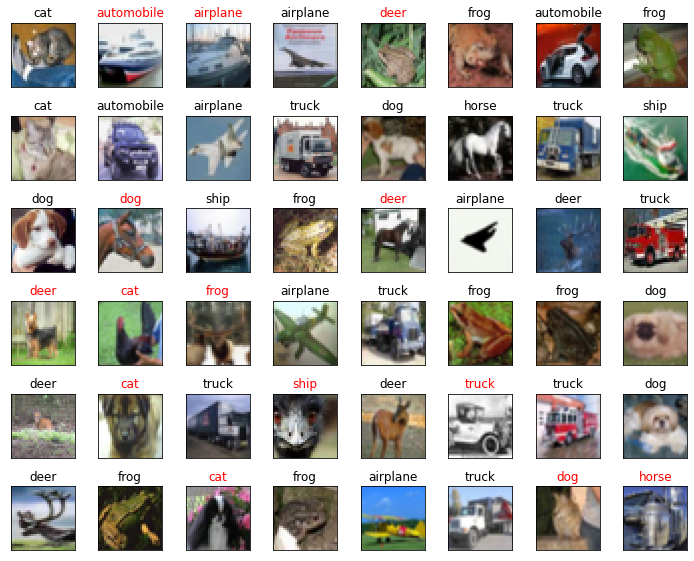

In [ ]:
fig, ax = plt.subplots(6, 8, subplot_kw=dict(xticks=[], yticks=[]), figsize=(10,8))
fig.tight_layout(pad=2)
for i, axi in enumerate(ax.flat):
  color = 'black'
  if y_classes[i]!=y_test[i][0]: color='r'
  axi.imshow(x_test[i], cmap='gray_r')
  axi.set_title(label_names[y_classes[i]], color=color)